# Wine Quality Test

#### The goal is to model wine quality based on physicochemical tests

### Author : Nitesh Ranjan Singh
####                 *University of Petroleum and Energy Studies, Dehradun*

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url)

In [41]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


#### reload the dataset by assigning the data separator

In [42]:
df=pd.read_csv(url,sep=';')

In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [34]:
df.shape

(1599, 12)

In [36]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Let's rename

In [46]:
df.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Lets Explore the Target Feature

In [47]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [49]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

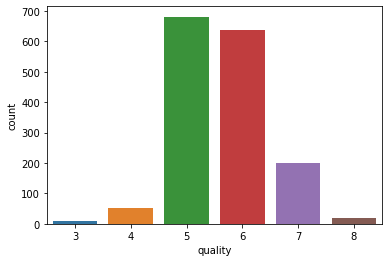

In [52]:
sns.countplot(x='quality',data=df)

#### create another variable 'rating'

In [57]:
case = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(case, rating, default='average')

In [58]:
df['rating'].value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [59]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


#### Lets check the correlation between the variables

<AxesSubplot:>

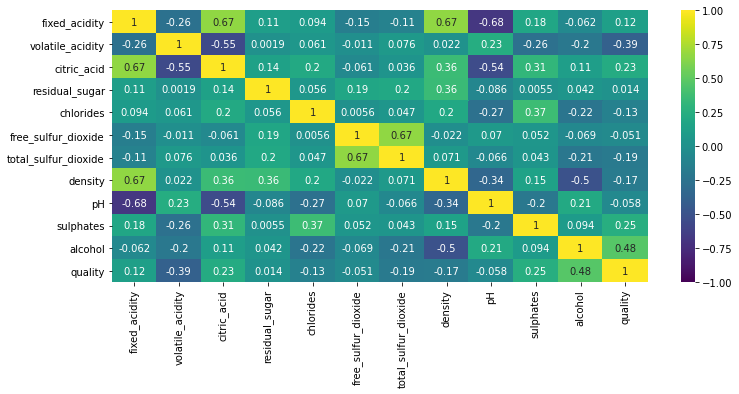

In [61]:
corr = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="viridis")

In [62]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

##### We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.
    
##### This means that,  we will use only these 4 variables in our future analysis.

### explore the variable 'alcohol'

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

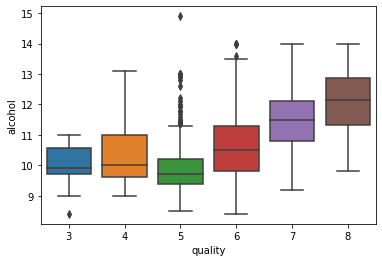

In [63]:
sns.boxplot(x='quality',y='alcohol',data=df)

<AxesSubplot:xlabel='rating', ylabel='alcohol'>

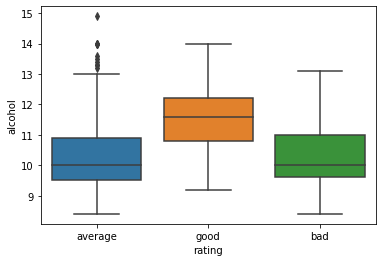

In [64]:
sns.boxplot(x='rating',y='alcohol',data=df)

#### Analysis of sulphate & rating

<AxesSubplot:xlabel='rating', ylabel='sulphates'>

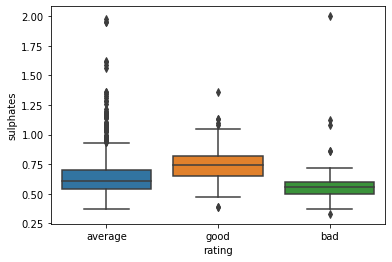

In [65]:
sns.boxplot(x='rating',y='sulphates',data=df)

#### analysis of citric_acid  and ratings

<AxesSubplot:xlabel='rating', ylabel='citric_acid'>

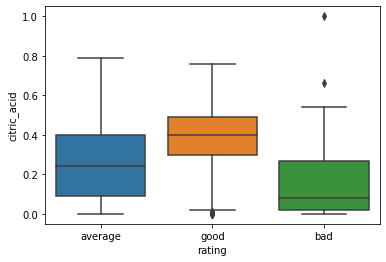

In [66]:
sns.boxplot(x='rating',y='citric_acid',data=df)

#### analysis of  fixed acidity & rating

<AxesSubplot:xlabel='rating', ylabel='fixed_acidity'>

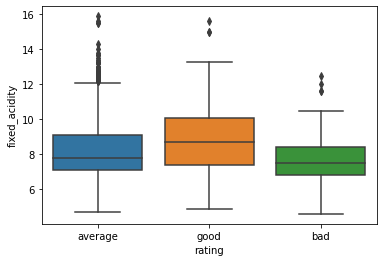

In [68]:
sns.boxplot(x='rating',y='fixed_acidity',data=df)

### Linear Regression

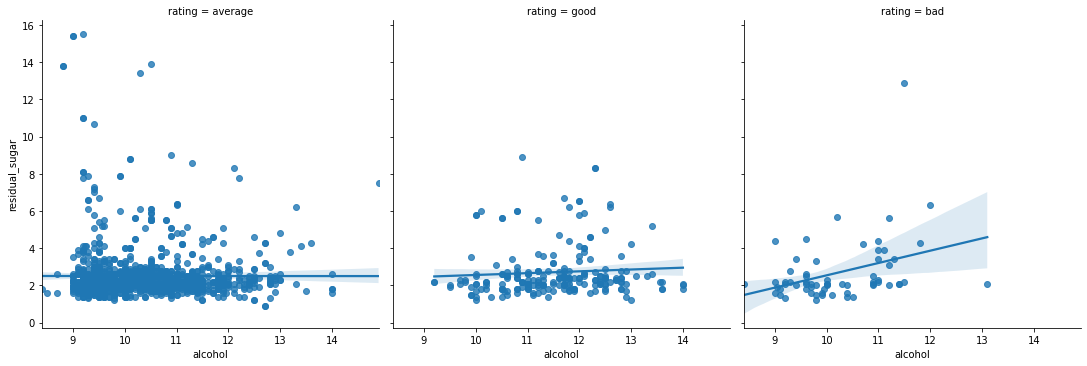

In [101]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = df)

This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.

#### importing neccesary libraries

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### model building

In [84]:
# separating input and output features

x1=df[['fixed_acidity','citric_acid','sulphates','alcohol']]
y1=df['quality']

In [85]:
x1

,fixed_acidity,citric_acid,sulphates,alcohol
0,7.4,0.00,0.56,9.4
1,7.8,0.00,0.68,9.8
2,7.8,0.04,0.65,9.8
3,11.2,0.56,0.58,9.8
4,7.4,0.00,0.56,9.4
...,...,...,...,...
1594,6.2,0.08,0.58,10.5
1595,5.9,0.10,0.76,11.2
1596,6.3,0.13,0.75,11.0
1597,5.9,0.12,0.71,10.2


In [86]:
# spliting data into test and train 

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)

In [87]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1119, 4) (480, 4) (1119,) (480,)


In [88]:
# setting intercept as True

lgr=LinearRegression(fit_intercept=True)

In [89]:
# model

model_lin=lgr.fit(x_train,y_train)

In [90]:
# predicting model on test set

wine_pred_lin=lgr.predict(x_test)

In [91]:
# computing MSE & RMSE

lin_mse=mean_squared_error(y_test,wine_pred_lin)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

0.6742097786590289


In [92]:
# R squared value => R sqrt value tell us how's good your model explian you variablty in y

r2_lin_test=model_lin.score(x_test,y_test)
r2_lin_train=model_lin.score(x_train,y_train)

In [95]:
print(r2_lin_test,r2_lin_train)

0.290977967603423 0.28403896479900237


In [105]:
df['rate_code'] = (df['quality'] > 4).astype(np.float32)

<AxesSubplot:ylabel='Density'>

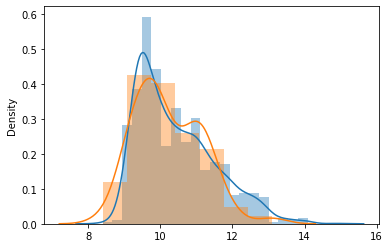

In [107]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

The above plot shows the higher probability for red wine quality will be good if alcohol percentage is more than equal to 12, whereas the same probability reduces as alcohol percentage decreases.

### Classification using Sklearn's LogisticRegression:

In [109]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = df)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



The accuracy matrix for sklearn's linear regression model for red wine quality prediction shows the overall 92% precision which is similar to previous statsmodel's average precision.

Also the precision for good wine (1) prediction is almost 96%.

But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.

### Classification using Sklearn's RandomForestClassifier:

In [111]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.52      0.52      1599
weighted avg       0.96      0.96      0.94      1599



Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of red wine quality, we can observe that the values have been improved significantly.

The precision for the prediction of bad quality wine (0) is almost 100% where as the precision for prediction of good quality wine (1) is approximately 96%.

This sklearn's random forest classifier model also has the overall precision around 96%, which is far better than the previous  models. 

## Conclusion

We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor 'quality' was not very helpful and to overcome this, so we created another variable called 'rating'.

To make predictions of wine quality and any other if required, we trained two models. As seen, the statsmodel and sklearn's Linear Regression model along with Random Forest Classifier. The Random Forest Classifier performed marginally better and we decided to stick with it if we had to make any more predictions.

The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.